In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Statistics about the data, including:
* Total sequences
* Top 5 longest and shortest sequences
* Average length of sequences
* Top 5 most and least common sequence length

In [20]:
def stats(dataset):
    dataset["length"].hist(bins=100)
    plt.show()

    print("-" * 40)

    print("Total sequences:", dataset.shape[0])

    print("-" * 40)

    print("Top 5 longest sequences:")
    print("id     length")
    print(dataset["length"].nlargest(5).to_string())

    print("-" * 40)

    print("Top 5 shortest sequences:")
    print("id      length")
    print(dataset["length"].nsmallest(5).to_string())

    print("-" * 40)

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("-" * 40)

    print("Top 5 most common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nlargest(5).to_string())
    
    print("-" * 40)

    print("Top 5 least common lengths:")
    print("length  count")
    print(dataset["length"].value_counts().nsmallest(5).to_string())

In [21]:
positive = pd.read_csv("../datasets/essential_genes/positive.csv")
print(positive.shape)

negative = pd.read_csv("../datasets/essential_genes/negative_unique.csv")
print(negative.shape)

(2010, 2)
(23443, 2)


In [22]:
negative_ids = negative["id"].values
unique_negative_ids = set(negative_ids)
print(len(negative_ids), len(unique_negative_ids), "unique negative ids")

from Bio.SeqIO.FastaIO import SimpleFastaParser
def read_fasta(filename):
    d = {}
    with open(filename) as handle:
        for key, sequence in SimpleFastaParser(handle):
            sequence = sequence.upper()
            if(sequence != "SEQUENCEUNAVAILABLE"):
                key = key.split("|")[0]
                d[key] = sequence
    print(len(d), "keys", len(d.values()), "seqs", len(set(d.values())), "unique")
    return d

d = read_fasta("../datasets/essential_genes/mart_export_unspliced.fa")

# replace negatives sequences with sequence from the dict
old_seq = negative["sequence"].values
negative["sequence"] = negative["id"].apply(lambda x: d[x])

# remove rows with repeating sequences
negative = negative.drop_duplicates(subset=["sequence"])
print(negative.shape)

23443 14574 unique negative ids
22824 keys 22824 seqs 22059 unique
[False False False ... False False  True]
(14453, 2)


In [23]:
# remove sequences with letters different from A, C, G, T
negative = negative[negative["sequence"].str.contains("^[ACGT]+$")]
positive = positive[positive["sequence"].str.contains("^[ACGT]+$")]

print(negative.shape)
print(positive.shape)

(14416, 2)
(2010, 2)


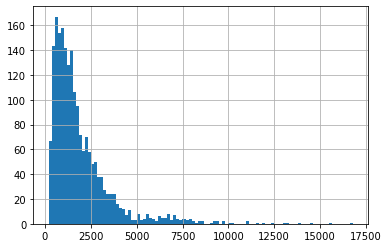

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


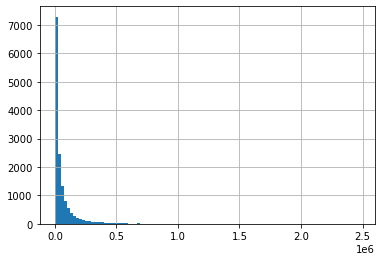

----------------------------------------
Total sequences: 14416
----------------------------------------
Top 5 longest sequences:
id     length
8599     2473539
14533    2304997
13345    2298757
22185    2298478
6069     2172911
----------------------------------------
Top 5 shortest sequences:
id      length
23423    39
23367    51
23422    54
23417    57
23373    63
----------------------------------------
Average length: 66718.0164400666
----------------------------------------
Top 5 most common lengths:
length  count
939     21
930     19
1593    18
945     14
942     11
----------------------------------------
Top 5 least common lengths:
length  count
93542     1
63515     1
284807    1
2876      1
735       1


In [24]:
# add a column that contains length of the sequence
positive["length"] = positive["sequence"].apply(len)
negative["length"] = negative["sequence"].apply(len)

stats(positive)
print("*" * 100)
stats(negative)

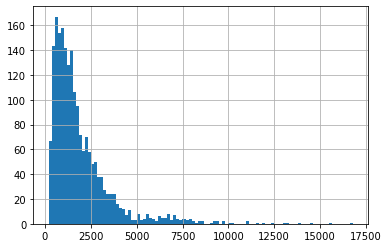

----------------------------------------
Total sequences: 2010
----------------------------------------
Top 5 longest sequences:
id     length
676    16791
248    15615
204    14574
491    13941
31     13167
----------------------------------------
Top 5 shortest sequences:
id      length
1112    192
1427    195
1500    204
1611    204
1346    210
----------------------------------------
Average length: 1903.5980099502488
----------------------------------------
Top 5 most common lengths:
length  count
1083    9
1041    8
1314    7
618     7
1371    7
----------------------------------------
Top 5 least common lengths:
length  count
2496    1
2763    1
3162    1
2982    1
3324    1
****************************************************************************************************


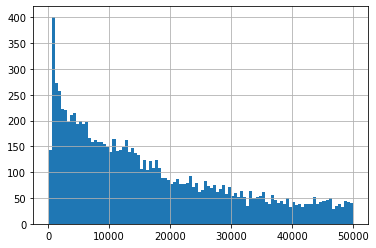

----------------------------------------
Total sequences: 9806
----------------------------------------
Top 5 longest sequences:
id     length
3611     49971
11382    49948
758      49928
3482     49904
15948    49875
----------------------------------------
Top 5 shortest sequences:
id      length
23367    51
23422    54
23417    57
23373    63
23403    66
----------------------------------------
Average length: 16484.900673057313
----------------------------------------
Top 5 most common lengths:
length  count
939     21
930     19
1593    18
945     14
942     11
----------------------------------------
Top 5 least common lengths:
length  count
13996    1
19302    1
28545    1
2198     1
15892    1


In [25]:
# remove seequnces with length less than 50
positive = positive[positive["length"] >= 50]
negative = negative[negative["length"] >= 50]

folder = "essential_genes_50k"
positive = positive[positive["length"] < 50000]
negative = negative[negative["length"] < 50000]

stats(positive)
print("*" * 100)
stats(negative)

In [26]:
positive["label"] = 1
negative["label"] = 0

dataset = pd.concat([positive, negative])

# remove length column
dataset = dataset.drop(columns=["length"])

dataset.to_csv("../datasets/" + folder + "/dataset.csv", index=False)

In [27]:
cutting_length = 2000

# cut sequences to the cutting length
dataset["sequence"] = dataset["sequence"].apply(lambda x: x[:cutting_length])

# fill with "N" the sequences that are shorter than cutting length
dataset["sequence"] = dataset["sequence"].apply(lambda x: x.ljust(cutting_length, "N"))

print(dataset.shape)

# write dataset to csv
dataset.to_csv("../datasets/" + folder + "_cut/dataset.csv", index=False)

(11816, 3)
